In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import matplotlib.image as mpimg
import cv2



### Create List of all file paths in your image directory

In [25]:
clip_name ='noise_vibrance'
clip_dir = f'C:\\Users\\MrLin\\OneDrive\\COMPLEX OBJECTS\\PROJECTS\\SATURATION\\JUPYTER NOTEBOOK\\movies\\{clip_name}'
imgs_dir = f'{clip_dir}\\imgs'
imgs_path = Path(imgs_dir)
file_paths = list(imgs_path.glob('*.png'))  # will list the entire path
N_frames = len(file_paths)

In [26]:
file_paths
N_frames

121

### Set pixels sampled from each image. This is fixed

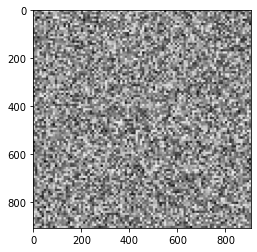

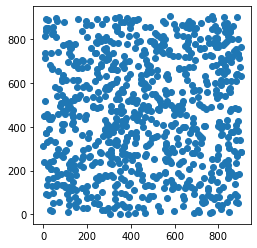

In [4]:
fraction_of_pixels_plotted = 0.001  # at 0.0005 leads to 1K pixels plotted

img = mpimg.imread(file_paths[0])
plt.imshow(img)
img = img[:, :, 0]  # 2D image needed to sample pixels
indices = np.random.choice(img.size, size=int(np.floor(img.size*fraction_of_pixels_plotted)), replace=False)
row_indices, col_indices = np.unravel_index(indices, img.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(col_indices, row_indices)
ax.set_aspect('equal')
plt.show()

In [5]:
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [6]:
def HLS_to_xyz(h, l, s):
    '''converts HLS values produced by cv2.cvtColor(img, cv2.COLOR_RGB2HLS) into xyz coordinates. (H, L, S) is analgous to cylindrical coords (theta, z, r)'''
    
    H = 2 * (h * np.pi/180 - np.pi / 2) # convert degrees to radians in the range [-pi, pi]
    
    S = s / 255  # normalize radius to [0, 1]
    z = l / 255  # normalize z to [0, 1]
    x, y = polar_to_cartesian(S, H)
    
    return x, y, z

In [31]:

plot = 'rgb'
# plot = 'hls'
dpi = 300

angle = np.linspace(0, 2 * np.pi + 0.2, 360) 
radius = 1
cx = radius * np.cos(angle) 
cy = radius * np.sin(angle) 
czplus = np.ones(angle.shape)
czminus = np.zeros(angle.shape)

frame_dict = {}
dat_stack_RGB = np.zeros(shape=(row_indices.size, 3, N_frames))
dat_stack_HLS = np.zeros(shape=(row_indices.size, 3, N_frames))

In [32]:
t = 0
for file_path in file_paths:
    if t < N_frames:
        # Load image
        img = cv2.imread(str(file_path))  # shape is [1080, 1920, 4] The 4th channel is alpha
        
        #cv2 uses BGR as default so we must convert back to RGB to plot in matplotlib
        img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
#         plt.imshow(img_RGB)
        
        # make HLS image
        img_HLS = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HLS)
        #normalize RGB values for plot
        img_RGB = img_RGB.astype(np.float32) / 255
        
        # extract pixels
        R = img_RGB[row_indices, col_indices, 0]
        G = img_RGB[row_indices, col_indices, 1]
        B = img_RGB[row_indices, col_indices, 2]
        RGB = np.vstack((R, G, B)).T
        dat_stack_RGB[:, :, t] =  RGB
        
        H = img_HLS[row_indices, col_indices, 0]
        L = img_HLS[row_indices, col_indices, 1]
        S = img_HLS[row_indices, col_indices, 2]
        x, y, z = HLS_to_xyz(H, L, S)
        
        HLS = np.vstack((H, L, S)).T
        dat_stack_HLS[:, :, t] = HLS  # stack
        
        
        # Create scatter plot
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
        
        
#         if plot=='rgb':
#             save_path = f'{clip_dir}\\plots_RGB'
#             # config for RGB plots
#             ax.scatter(R, G, B, c=RGB)
#             ax.set_xlim([0, 1])
#             ax.set_ylim([0, 1])
#             ax.set_zlim([0, 1])
#             ax.set_xlabel('Red', fontsize=14)
#             ax.set_ylabel('Green', fontsize=14)
#             ax.set_zlabel('Blue', fontsize=14)
#             ax.tick_params(axis='both', which='major', labelsize=9)
#             ax.view_init(elev=30, azim=-45)
            
#         elif plot=='hls':
#             save_path = f'{clip_dir}\\plots_HSL'
#             # config for HLS plots
#             ax.scatter(x, y, z, c=RGB)
#             ax.plot(cx, cy, czminus, color=[0.5,0.5,0.5])
#             ax.set_xlim([-1, 1])
#             ax.set_ylim([-1, 1])
#             ax.set_zlim([0, 1])
#             ax.tick_params(axis='both', which='major', labelsize=9)
#             ax.set_xticklabels([])
#             ax.set_yticklabels([])
#             ax.view_init(elev=50, azim=-45)
            

    
#         plt.show()
        filename = f"plot_{clip_name}_{t:03d}.png"
#         fig.savefig(f"{save_path}\\{filename}", bbox_inches='tight', pad_inches=0.3, dpi=dpi, transparent=True)
        plt.close()
    t += 1


In [33]:
dat_stack_RGB.shape
# save_path_hls = f'{clip_dir}\\dat_stack_HLS.npy'
# np.save(save_path_hls, dat_stack_HLS, allow_pickle=True)

# save_path_rgb = f'{clip_dir}\\dat_stack_RGB.npy'
# np.save(save_path_rgb, dat_stack_RGB, allow_pickle=True)

(819, 3, 121)

In [11]:
T = list(range(0, N_frames))
sample_indices = np.random.choice(dat_stack_RGB.shape[0], size=40, replace=False)
sample_indices

array([443,  62, 393, 675, 638, 706, 563, 450, 687, 508,  18, 643,  66,
       219, 244,  87,  59, 496, 370, 288, 183, 596, 167, 184, 475, 573,
       503, 176, 333, 344, 231, 710, 574, 157, 367, 743, 790, 328, 728,
       564])

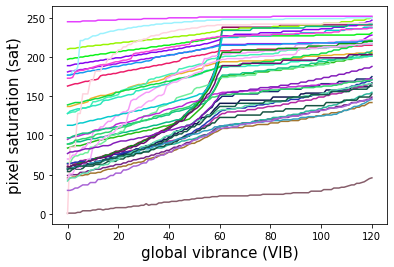

In [34]:
fig = plt.figure()

for j in sample_indices:
    sat = dat_stack_HLS[j, 2, :]
    col = dat_stack_RGB[j, :, -1]
    plt.plot(T, sat, color=col)
    
plt.xlabel('global vibrance (VIB)', fontsize=15)
plt.ylabel('pixel saturation (sat)', fontsize=15)
plt.show()

filename = f"pixel sat over VIB 40.png"
fig.savefig(f"{clip_dir}\\{filename}", bbox_inches='tight', pad_inches=0.1, dpi=280, transparent=True)

In [68]:
# img = mpimg.imread(file_paths[50])
# img = cv2.imread(str(file_paths[60]))

# R = img[row_indices, col_indices, 0]
# G = img[row_indices, col_indices, 1]
# B = img[row_indices, col_indices, 2]
# RGB = np.vstack((R, G, B)).T
# img_HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
# img_HLS.shape
# H = img_HLS[row_indices, col_indices, 0]  # in [0, 179] like degrees
# L = img_HLS[row_indices, col_indices, 1]  # in [0 255]
# S = img_HLS[row_indices, col_indices, 2]  # in [0 255]
# HLS = np.vstack((H, L, S)).T

# HLS

# x, y, z = HLS_to_xyz(H, L, S)
# z

# np.max(RGB, axis=0)

array([255, 250, 255], dtype=uint8)